<a href="https://www.kaggle.com/code/vishorita/layoffs-deep-analysis-with-eda?scriptVersionId=121418103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/layoffs-data-2022/layoffs_data.csv


In [2]:
# read in the "layoffs_data.csv" file using pandas and store it in a DataFrame named "df"
df = pd.read_csv('/kaggle/input/layoffs-data-2022/layoffs_data.csv')
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06 00:00:00,https://www.cnbc.com/2023/03/06/atlassian-cuts...,210.0,Post-IPO,2023-03-07 00:12:52,Australia,Unknown
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06 00:00:00,https://variety.com/2023/digital/news/siriusxm...,525.0,Post-IPO,2023-03-07 00:15:07,United States,Unknown
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06 00:00:00,https://techcabal.com/2023/03/06/alerzo-lays-o...,16.0,Series B,2023-03-07 01:30:17,Nigeria,Unknown
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06 00:00:00,https://www.financialexpress.com/industry/upgr...,631.0,Unknown,2023-03-07 01:26:02,India,Unknown
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03 00:00:00,https://startups.com.br/demissoes/loft/,788.0,Unknown,2023-03-03 23:01:02,Brazil,Unknown


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2357 non-null   object 
 1   Location_HQ                 2357 non-null   object 
 2   Industry                    2357 non-null   object 
 3   Laid_Off_Count              1618 non-null   float64
 4   Percentage                  1573 non-null   float64
 5   Date                        2356 non-null   object 
 6   Source                      2357 non-null   object 
 7   Funds_Raised                2148 non-null   float64
 8   Stage                       2357 non-null   object 
 9   Date_Added                  2357 non-null   object 
 10  Country                     2357 non-null   object 
 11  List_of_Employees_Laid_Off  2356 non-null   object 
dtypes: float64(3), object(9)
memory usage: 221.1+ KB


In [4]:
# create a new DataFrame called "layoffs_df" containing a subset of columns from the original DataFrame "df"
# the subset includes columns 'Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage', 'Date', and 'Country'
# the "copy()" method is used to create a new copy of the DataFrame, rather than modifying the original DataFrame
layoffs_df = df[['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage', 'Date', 'Country']].copy()

In [5]:
# convert the 'Date' column in the "layoffs_df" DataFrame from a string to a datetime object using the "to_datetime()" method from pandas
layoffs_df['Date'] = pd.to_datetime(layoffs_df['Date'])

# create a new column in the "layoffs_df" DataFrame called 'year' by extracting the year from the 'Date' column using the "dt.strftime()" method from pandas
# the "%Y" format code is used to extract the year in 4-digit format
layoffs_df['year'] = layoffs_df['Date'].dt.strftime('%Y')

# create a new column in the "layoffs_df" DataFrame called 'mon-year' by extracting the year and month from the 'Date' column using the "dt.strftime()" method from pandas
# the "%Y-%m" format code is used to extract the year and month in yyyy-mm format
layoffs_df['mon-year'] = layoffs_df['Date'].dt.strftime("%Y-%m")

In [6]:
layoffs_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Country,year,mon-year
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Australia,2023,2023-03
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,United States,2023,2023-03
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Nigeria,2023,2023-03
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,India,2023,2023-03
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Brazil,2023,2023-03


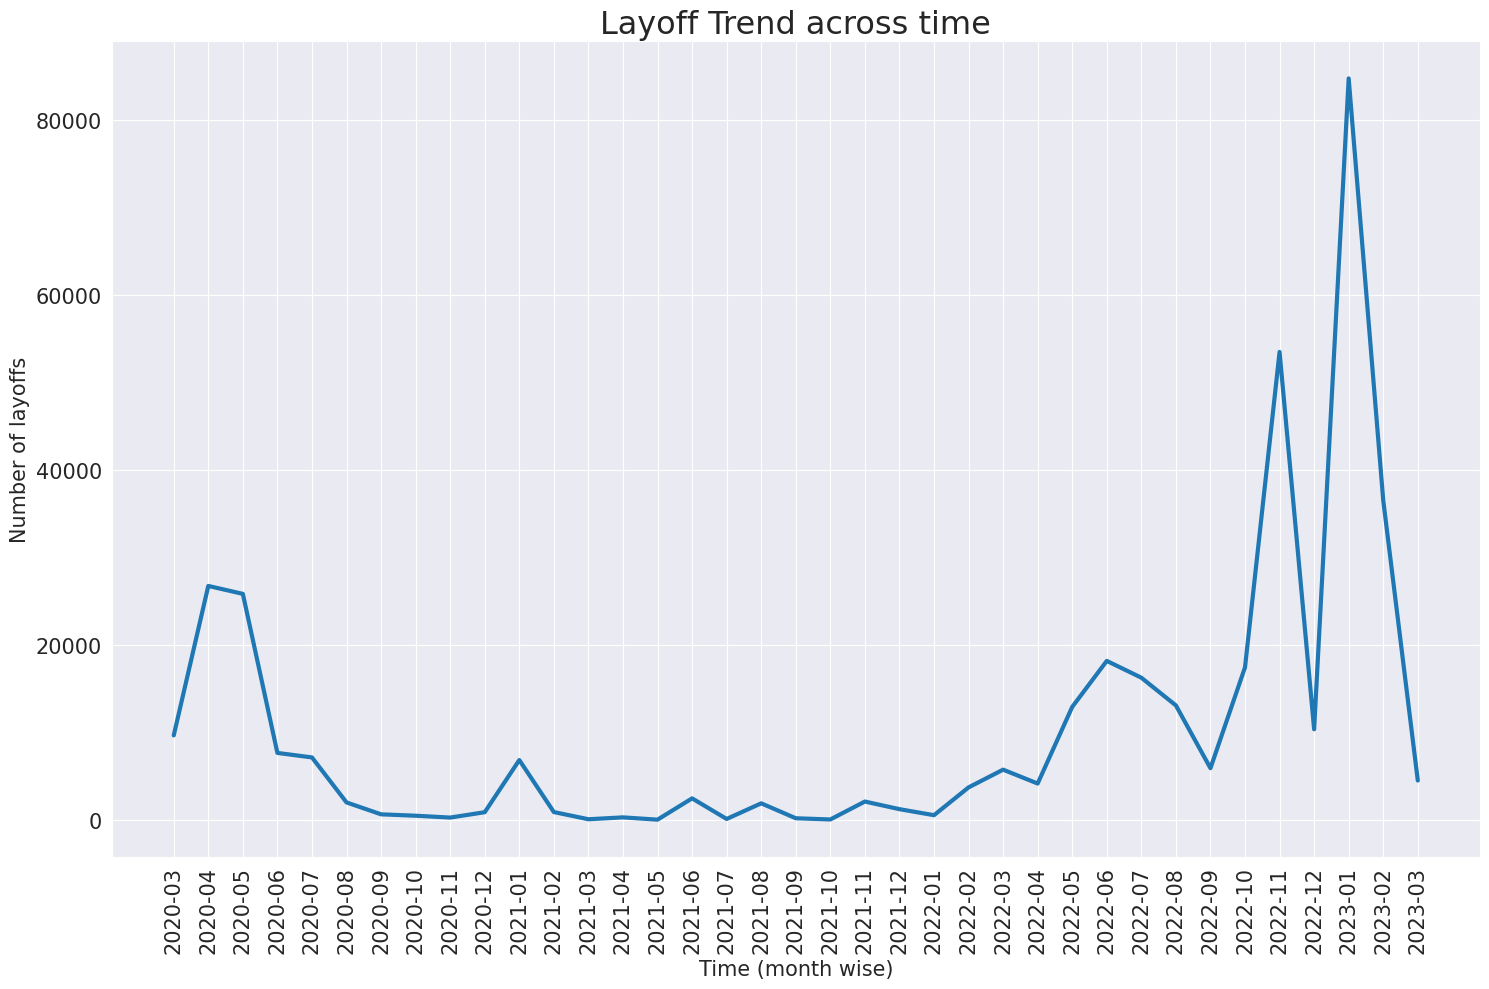

In [7]:
# create a new figure with size 15 inches by 10 inches using the "figure()" method from matplotlib.pyplot
plt.figure(figsize=(15,10))

# set the style of the plot to 'darkgrid' using the "set_style()" method from seaborn
sns.set_style('darkgrid')

# create a line plot using the "lineplot()" method from seaborn, with the x-axis as 'mon-year', y-axis as 'Laid_Off_Count'
# the data is obtained by grouping the "layoffs_df" DataFrame by 'mon-year', summing the 'Laid_Off_Count' column, and then selecting only the 'mon-year' and 'Laid_Off_Count' columns using "reset_index()" and "loc[]" methods
# the "linewidth" parameter sets the thickness of the line to 3
sns.lineplot(x='mon-year', y='Laid_Off_Count', data=layoffs_df.groupby('mon-year').sum().reset_index()[['mon-year','Laid_Off_Count']],linewidth=3)

# set the font size and rotation of the x-axis labels using the "xticks()" method from matplotlib.pyplot
plt.xticks(fontsize=15, rotation=90)

# set the font size of the y-axis labels using the "yticks()" method from matplotlib.pyplot
plt.yticks(fontsize=15)

# set the label for the x-axis using the "xlabel()" method from matplotlib.pyplot
plt.xlabel(xlabel='Time (month wise)', fontsize=15)

# set the label for the y-axis using the "ylabel()" method from matplotlib.pyplot
plt.ylabel(ylabel='Number of layoffs', fontsize=15)

# set the title of the plot using the "title()" method from matplotlib.pyplot
plt.title('Layoff Trend across time', fontsize=23)

# adjust the spacing of the subplots using the "tight_layout()" method from matplotlib.pyplot
plt.tight_layout()

# display the plot using the "show()" method from matplotlib.pyplot
plt.show()

In [8]:
# multiply the 'Percentage' column in the "layoffs_df" DataFrame by 100 to convert the decimal values to percentages
layoffs_df['Percentage'] = layoffs_df['Percentage']*100

# display the first few rows of the "layoffs_df" DataFrame using the "head()" method
layoffs_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Country,year,mon-year
0,Atlassian,Sydney,Other,500.0,5.0,2023-03-06,Australia,2023,2023-03
1,SiriusXM,New York City,Media,475.0,8.0,2023-03-06,United States,2023,2023-03
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Nigeria,2023,2023-03
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,India,2023,2023-03
4,Loft,Sao Paulo,Real Estate,340.0,15.0,2023-03-03,Brazil,2023,2023-03


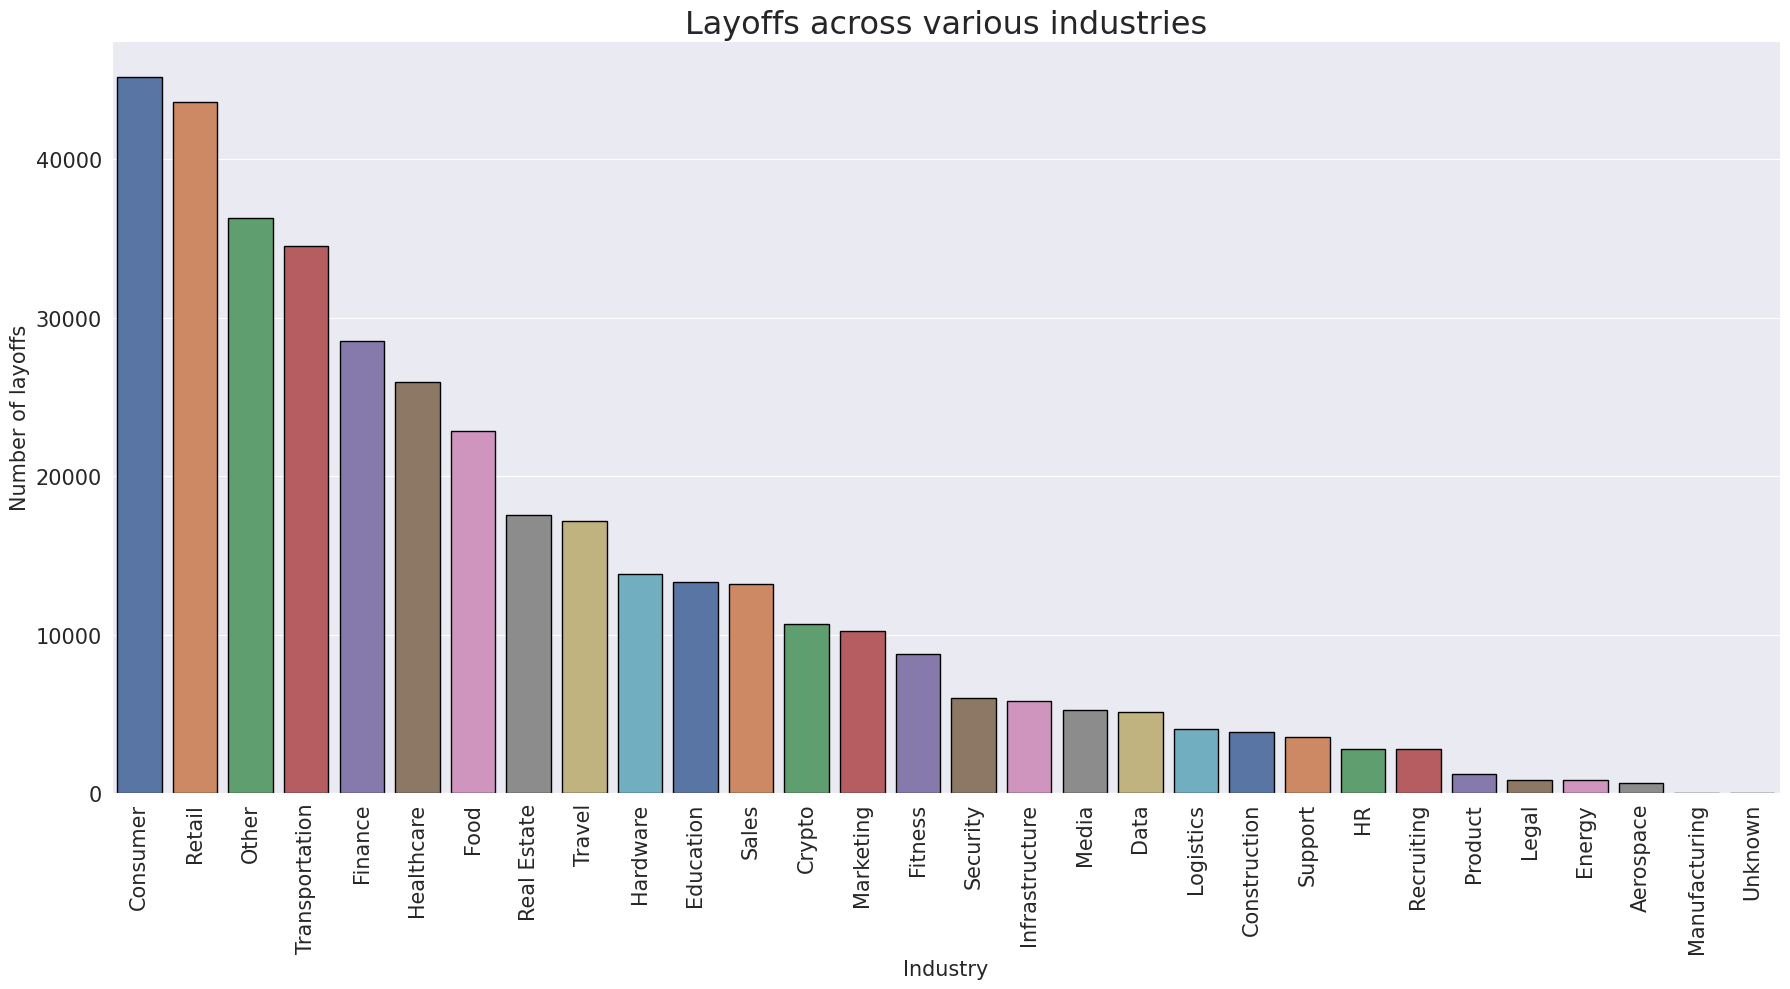

In [9]:
# Set the style of the plot to 'darkgrid' using the "set_style()" method from seaborn
sns.set_style('darkgrid')

# Create a new figure with size 18 inches by 10 inches using the "figure()" method from matplotlib.pyplot
plt.figure(figsize=(18,10))

# Create a bar plot using the "barplot()" method from seaborn, with the x-axis representing the various industries, and the y-axis representing the total number of layoffs.
# The data is obtained by grouping the "layoffs_df" DataFrame by 'Industry', summing the 'Laid_Off_Count' column, and then sorting the results in descending order of 'Laid_Off_Count' using the "sort_values()" method.
# The "ci" parameter is set to None to remove the confidence intervals from the plot.
# The "palette" parameter is set to 'deep' to use a color palette that is suitable for the number of categories in the plot.
# The "linewidth" parameter sets the width of the line around the bars to 1.
# The "edgecolor" parameter sets the color of the line around the bars to black.
sns.barplot(x='Industry', y='Laid_Off_Count', data=layoffs_df.groupby('Industry').sum().sort_values('Laid_Off_Count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')

# Set the font size and rotation of the x-axis labels using the "xticks()" method from matplotlib.pyplot
plt.xticks(fontsize=15, rotation=90)

# Set the font size of the y-axis labels using the "yticks()" method from matplotlib.pyplot
plt.yticks(fontsize=15)

# Set the label for the x-axis using the "xlabel()" method from matplotlib.pyplot
plt.xlabel(xlabel='Industry', fontsize=15)

# Set the label for the y-axis using the "ylabel()" method from matplotlib.pyplot
plt.ylabel(ylabel='Number of layoffs', fontsize=15)

# Set the title of the plot using the "title()" method from matplotlib.pyplot
plt.title('Layoffs across various industries', fontsize=23)

# Adjust the spacing of the subplots using the "tight_layout()" method from matplotlib.pyplot
plt.tight_layout()

# Display the plot using the "show()" method from matplotlib.pyplot
plt.show()

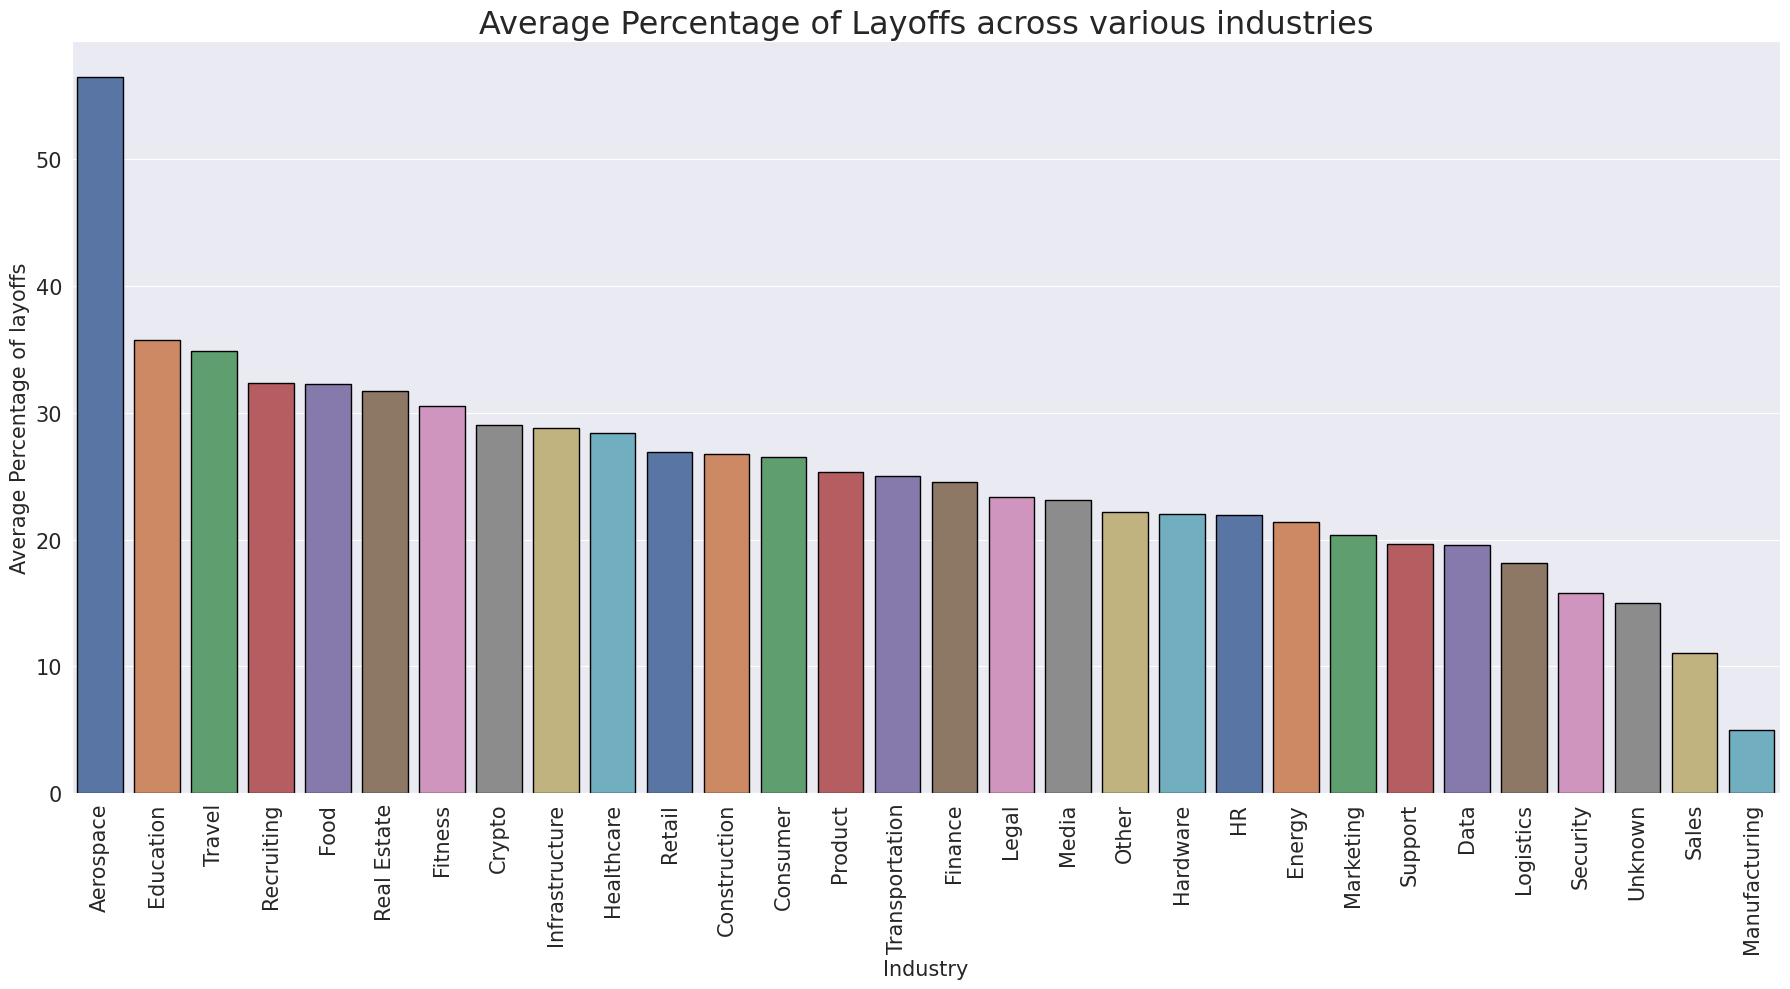

In [10]:
# Group the dataframe by industry, calculate the mean percentage of layoffs in each industry, 
# sort the industries in descending order of the mean percentage and select only the industry names
order = layoffs_df.groupby('Industry').mean()['Percentage'].reset_index().sort_values('Percentage', ascending=False)['Industry']

# Set the figure size and style
plt.figure(figsize=(18,10))
sns.set_style('darkgrid')

# Create a bar plot showing the average percentage of layoffs for each industry
sns.barplot(x='Industry', y='Percentage', data=layoffs_df.sort_values('Percentage', ascending=False), 
            order = order, ci=None, palette='deep',linewidth=1,edgecolor='black')

# Set the x-axis and y-axis labels and font sizes
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='Industry', fontsize=15)
plt.ylabel(ylabel='Average Percentage of layoffs', fontsize=15)

# Set the title and font size
plt.title('Average Percentage of Layoffs across various industries', fontsize=23)

# Ensure tight layout and show the plot
plt.tight_layout()
plt.show()

In [11]:
# This line of code groups the rows of the 'layoffs_df' DataFrame by the 'Country' column and calculates the sum of the values in each group.
# The 'as_index=False' argument ensures that the 'Country' column is included in the resulting DataFrame as a regular column instead of being used as the index.
laidOff_countByCountry = layoffs_df.groupby('Country', as_index=False).sum()

In [12]:
layoffs_df = layoffs_df[layoffs_df['Laid_Off_Count'].notna()] #removing null values

In [13]:
# Define a list of countries in Asia.
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']

# Define a list of countries in Europe.
europe = ['Austria', 'Bulgaria', 'Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

# Define a list of countries in North America.
n_america = ['Canada', 'Mexico', 'United States']

# Define a list of countries in South America.
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

# Define a list of countries in Africa.
africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']

# Define a list of countries in Oceania.
oceania = ['Australia', 'New Zealand']

In [14]:
# Filter the 'laidOff_countByCountry' DataFrame to only include countries in Asia.
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]

# Filter the 'laidOff_countByCountry' DataFrame to only include countries in Europe.
europe_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]

# Filter the 'laidOff_countByCountry' DataFrame to only include countries in North America.
nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]

# Filter the 'laidOff_countByCountry' DataFrame to only include countries in South America.
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]

# Filter the 'laidOff_countByCountry' DataFrame to only include countries in Africa.
africa_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]

# Filter the 'laidOff_countByCountry' DataFrame to only include countries in Oceania.
oceania_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]

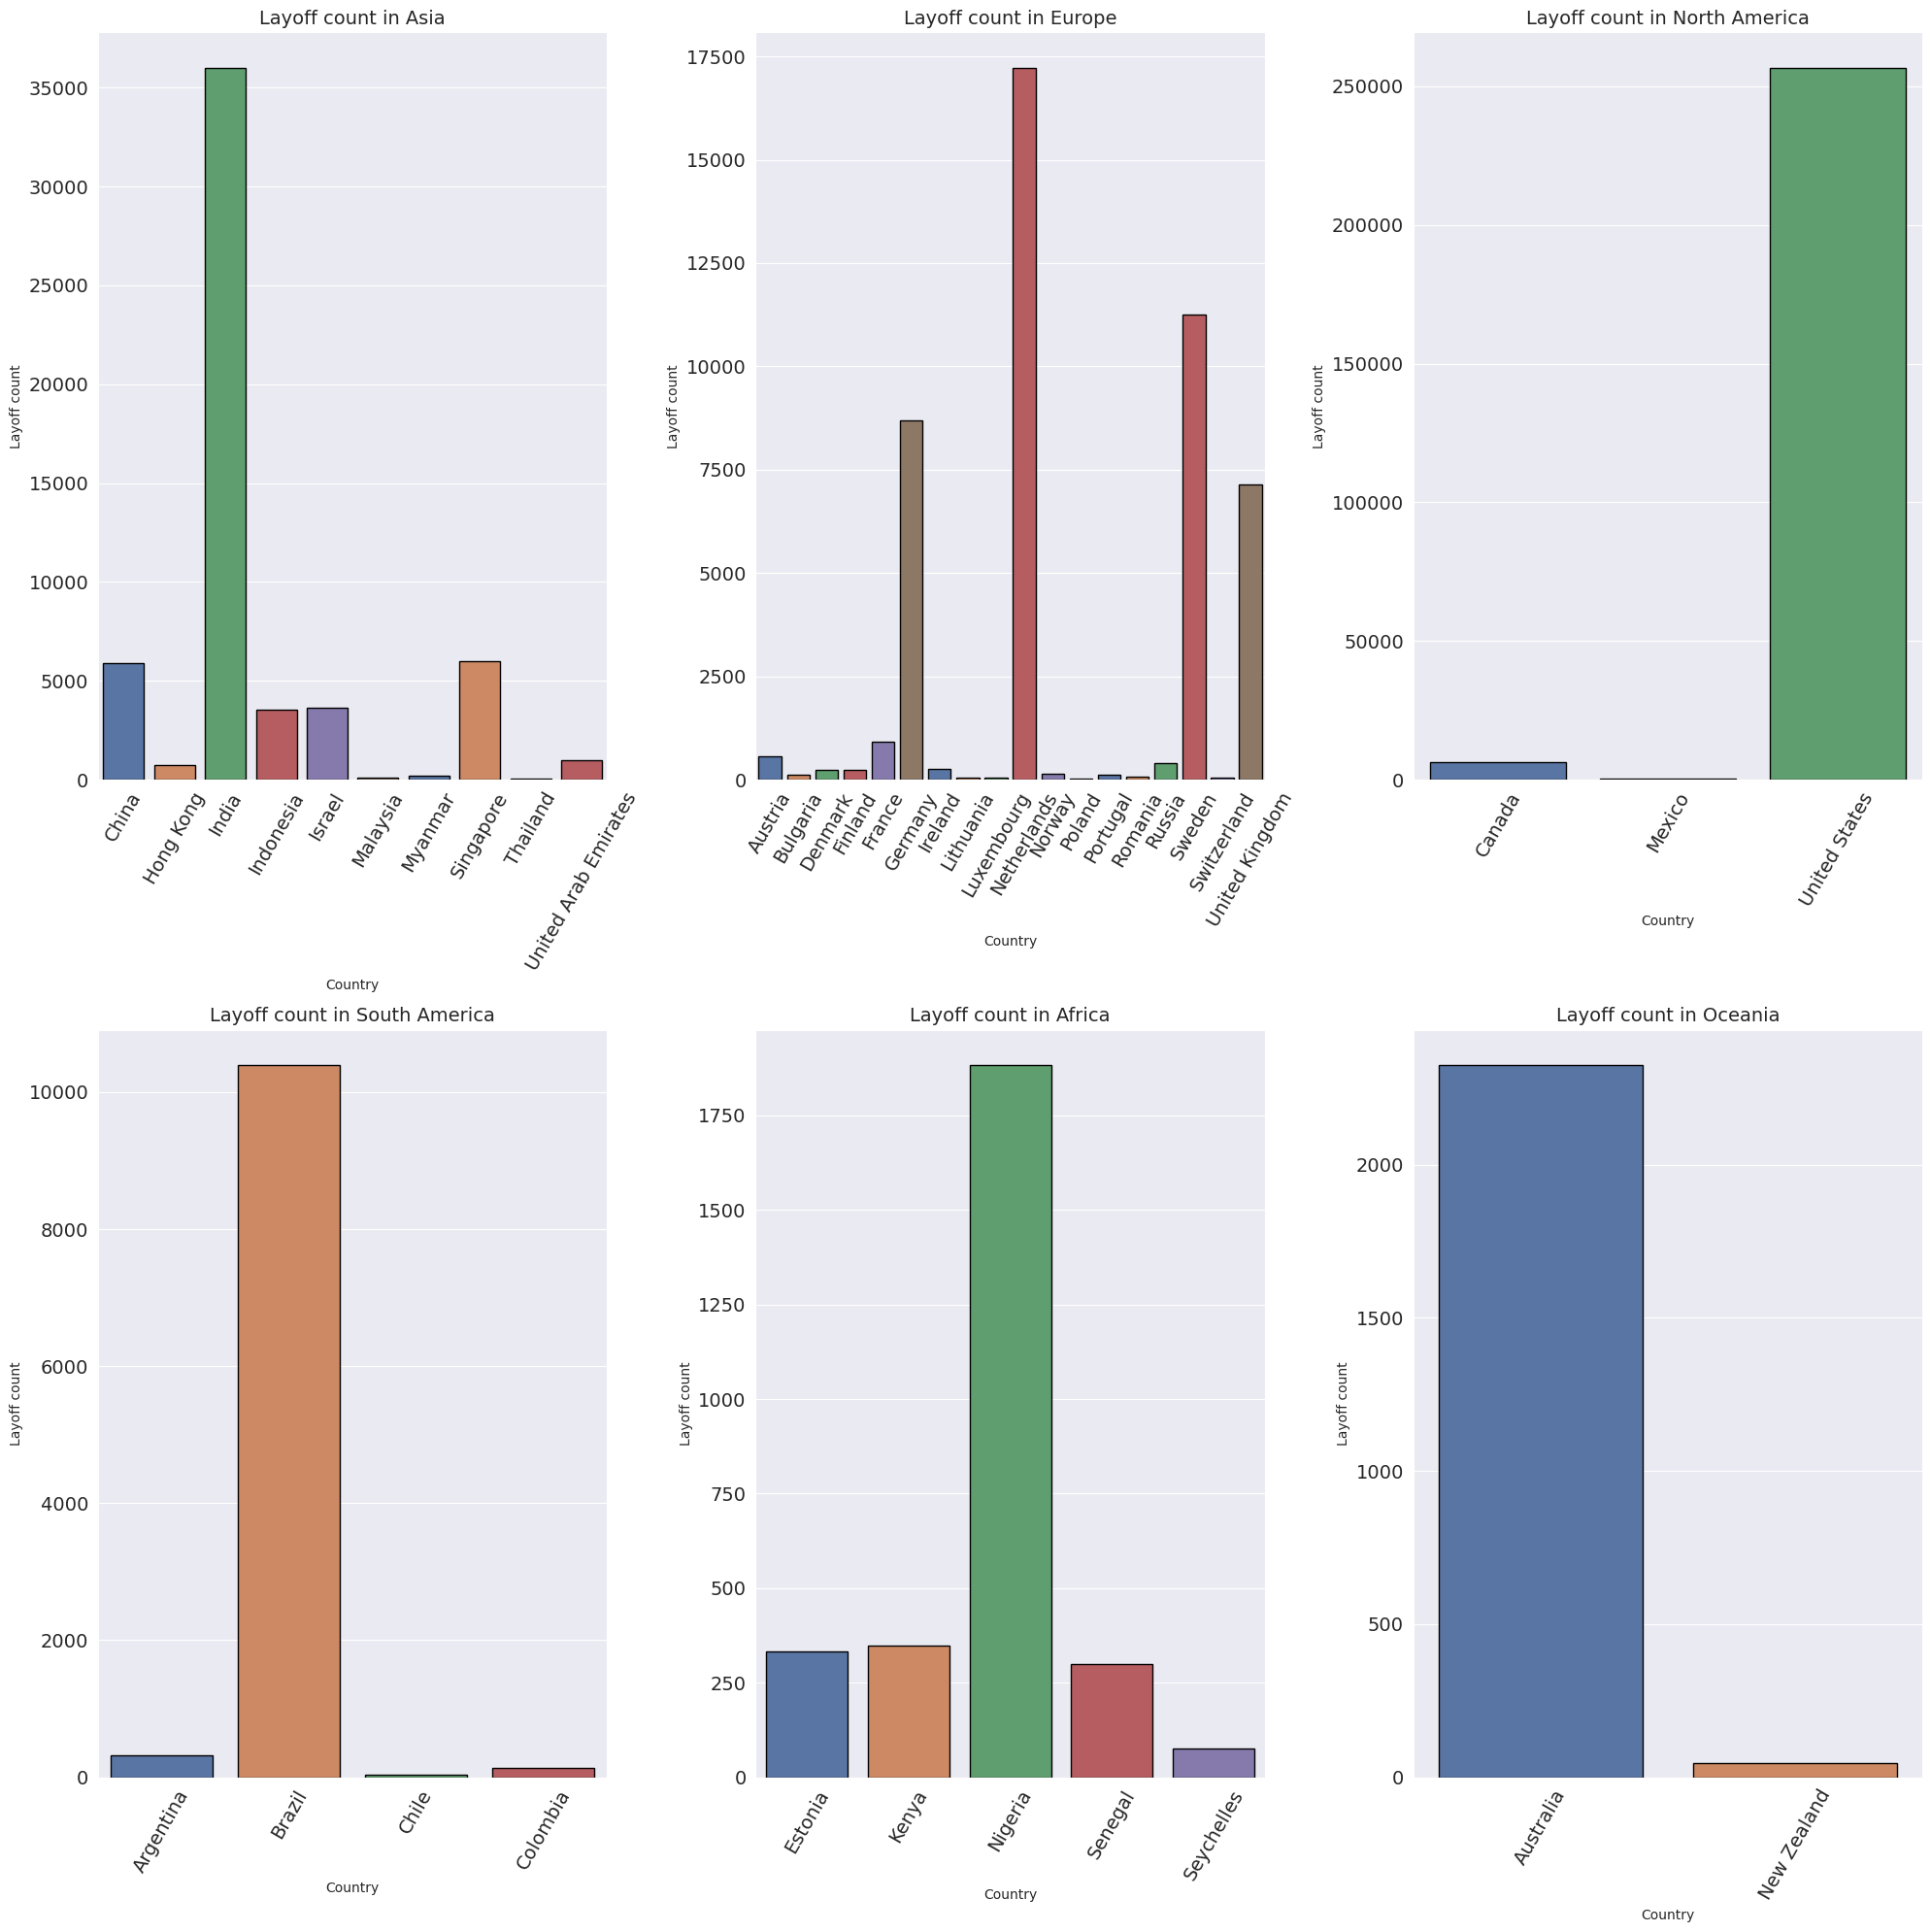

In [15]:
# Set figure size and style
plt.figure(figsize=(20, 20))
sns.set_style('darkgrid')
palette = sns.color_palette('deep', n_colors=6)

# First row of subplots
plt.subplot(2, 3, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 3, 2)
sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 3, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Second row of subplots
plt.subplot(2, 3, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 3, 5)
sns.barplot(data=africa_insight, y=africa_insight['Laid_Off_Count'], x=africa_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 3, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Laid_Off_Count'], x=oceania_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [16]:
# Define the countries to include in the visualization
mass_layoff_countries_list = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

# Filter the data to include only the selected countries
mass_layoff_countries = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(mass_layoff_countries_list)]

# Create a pie chart
fig = px.pie(mass_layoff_countries,
             names='Country',
             values='Laid_Off_Count',
             title='Countries with the Most Layoffs in 2021',
             labels={'Laid_Off_Count': 'Number of Layoffs'},
             hole=0.4)


fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the chart
fig.show()


In [17]:
# Sort the DataFrame by 'Laid_Off_Count' in descending order
top10_comp = layoffs_df.sort_values('Laid_Off_Count', ascending=False)

# Select the top 10 companies with the highest number of layoffs
top10_comp = top10_comp.head(10)

# Display the resulting DataFrame
top10_comp

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Country,year,mon-year
281,Google,SF Bay Area,Consumer,12000.0,6.0,2023-01-20,United States,2023,2023-01
749,Meta,SF Bay Area,Consumer,11000.0,13.0,2022-11-09,United States,2022,2022-11
314,Microsoft,Seattle,Other,10000.0,5.0,2023-01-18,United States,2023,2023-01
681,Amazon,Seattle,Retail,10000.0,3.0,2022-11-16,United States,2022,2022-11
39,Ericsson,Stockholm,Other,8500.0,8.0,2023-02-24,Sweden,2023,2023-02
454,Salesforce,SF Bay Area,Sales,8000.0,10.0,2023-01-04,United States,2023,2023-01
453,Amazon,Seattle,Retail,8000.0,2.0,2023-01-04,United States,2023,2023-01
148,Dell,Austin,Hardware,6650.0,5.0,2023-02-06,United States,2023,2023-02
210,Philips,Amsterdam,Healthcare,6000.0,13.0,2023-01-30,Netherlands,2023,2023-01
1780,Booking.com,Amsterdam,Travel,4375.0,25.0,2020-07-30,Netherlands,2020,2020-07


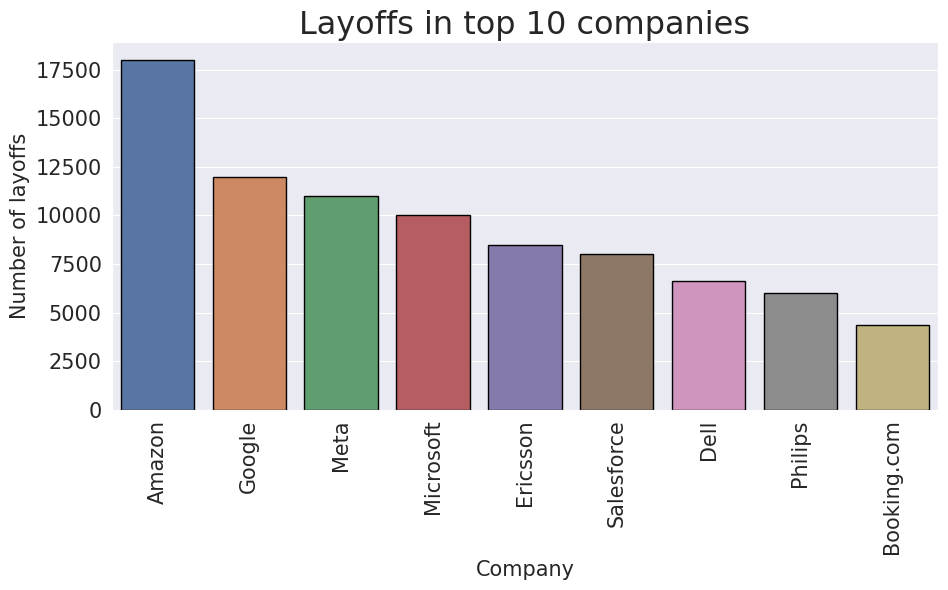

In [18]:
# Set style for the plot
sns.set_style('darkgrid')

# Create a figure with a size of 18x6 inches
plt.figure(figsize=(18,6))

# Create a subplot with 1 row, 2 columns, and set the current axis to the first subplot
plt.subplot(1, 2, 1)

# Create a barplot using data from top10_comp dataframe and group it by the company column, sum the laid off count for each company, sort values by laid off count in descending order and reset index
sns.barplot(x='Company', y='Laid_Off_Count', data=top10_comp.groupby('Company').sum().sort_values('Laid_Off_Count', ascending=False).reset_index(), ci=None, palette='deep',linewidth=1,edgecolor='black')

# Set x-tick labels to rotate 90 degrees and fontsize to 15
plt.xticks(fontsize=15, rotation=90)

# Set y-tick labels fontsize to 15
plt.yticks(fontsize=15)

# Set xlabel with the text 'Company' and fontsize to 15
plt.xlabel(xlabel='Company', fontsize=15)

# Set ylabel with the text 'Number of layoffs' and fontsize to 15
plt.ylabel(ylabel='Number of layoffs', fontsize=15)

# Set title with the text 'Layoffs in top 10 companies' and fontsize to 23
plt.title('Layoffs in top 10 companies', fontsize=23)

# Adjust the subplot layout to fit the plot without overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
# Group top10_comp dataframe by Country column and aggregate the sum of Laid_Off_Count for each country, then reset the index
df_agg = top10_comp.groupby(['Country']).agg({'Laid_Off_Count': 'sum'}).reset_index()

# Create a choropleth map using Plotly and assign it to the variable fig
fig = px.choropleth(df_agg, locations='Country', locationmode='country names', color='Laid_Off_Count', hover_name='Country', projection='natural earth', title='Total Layoffs by Country')

# Display the figure
fig.show()


In [20]:
# Create an instance of the Nominatim class and set the user_agent parameter to "my-app"
geolocator = Nominatim(user_agent="my-app")

# Create new columns in the top10_comp dataframe for latitude and longitude
# The latitude and longitude values are obtained by calling geolocator.geocode() on the Location_HQ column and extracting the latitude and longitude attributes
# If geolocator.geocode() returns None (i.e., if the location cannot be found), then None is assigned to the latitude and longitude columns
top10_comp['Latitude'] = top10_comp['Location_HQ'].apply(lambda x: geolocator.geocode(x).latitude if geolocator.geocode(x) else None)
top10_comp['Longitude'] = top10_comp['Location_HQ'].apply(lambda x: geolocator.geocode(x).longitude if geolocator.geocode(x) else None)

In [21]:
# Import the plotly express and scatter_mapbox functions from the plotly library
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Create a scatter plot on a Mapbox map using the top10_comp dataframe
# The 'lat' and 'lon' parameters specify the latitude and longitude columns in the top10_comp dataframe
# The 'hover_name' parameter specifies the column to use for hover information
# The 'hover_data' parameter specifies additional columns to include in the hover information
# The 'color' parameter specifies the column to use for the color of the markers
# The 'size' parameter specifies the column to use for the size of the markers
# The 'size_max' parameter specifies the maximum size of the markers
# The 'opacity' parameter specifies the opacity of the markers
# The 'center' parameter specifies the center of the map (in latitude and longitude coordinates)
# The 'zoom' parameter specifies the initial zoom level of the map
# The 'height' and 'width' parameters specify the size of the figure
# The 'mapbox_style' parameter specifies the style of the map
top10_comp_fig = px.scatter_mapbox(top10_comp,lat='Latitude',lon='Longitude', hover_name='Location_HQ', hover_data=['Laid_Off_Count', "Company"], 
    color='Laid_Off_Count',
    size="Laid_Off_Count", size_max=50, opacity=0.4,
    center={'lat':10, 'lon':30},
    zoom=1,
    height=400,width=1400,
    mapbox_style="open-street-map")

# Update the layout of the figure to remove the default margins
top10_comp_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Update the layout of the figure to add a title
top10_comp_fig.update_layout(title_text="Population of each cities")

# Display the figure
top10_comp_fig.show()